Group Exercise 2-Neural Networks

Sumit Patil

Saurabh Patil

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
x = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset (9).csv


In [3]:
file_path = list(x.keys())[0]
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Head:")
print(df.head())

Dataset Head:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


1. Feedforward Neural Network (FFNN):

Left graph shows both the training and validation loss decrease over epochs, which suggests the model is learning and improving its predictions. The losses converge with increased number of epochs and it is not overfitting because validation loss does not divert quite a bit from training loss. This pattern is indicative of a well-trained FFNN.

Right graph shows both training and validation accuracy increase with epochs, heading toward 1.0 (100%). The validation accuracy is slightly more volatile than the training one, which is expected with a smaller size and variability in the validation set. The close alignment of the training and validation accuracy curves indicates good generalization by the model.

4
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3117 - loss: 1.3730 - val_accuracy: 0.2937 - val_loss: 1.3190
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.3303 - val_accuracy: 0.3438 - val_loss: 1.2867
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3766 - loss: 1.2839 - val_accuracy: 0.4062 - val_loss: 1.2516
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3962 - loss: 1.2578 - val_accuracy: 0.4313 - val_loss: 1.2084
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4679 - loss: 1.1597 - val_accuracy: 0.4938 - val_loss: 1.1521
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5075 - loss: 1.1454 - val_accuracy: 0.5125 - val_loss: 1.0886
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5660 - loss: 1.0505 - val_accuracy: 0.5938 - val_loss: 1.0211
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6342 - loss: 0.9761 - val_accuracy: 0.6250 - val_

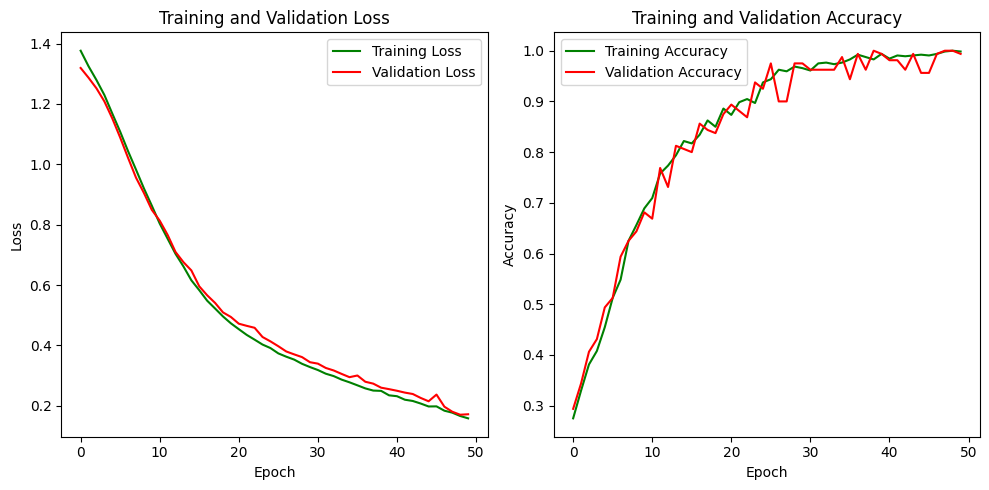

In [5]:
# 1. Feedforward Neural Network (FFNN):
X = df.drop('Quantity', axis=1)
y = df['Quantity']

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=np.number).columns
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_numerical)
X_test = scaler.transform(X_test_numerical)

print (X_train.shape[1])

# Build FFNN model
num_regions = len(np.unique(y_encoded))
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(num_regions, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Adaptive Moment Estimation (adam) adjusts the weights of neurons dynamically and efficiently during training.

# loss function It measures how well the predicted probabilities from the model match the actual labels.
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss',color='green')
plt.plot(history.history['val_loss'], label='Validation Loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy',color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

2. Convolutional Neural Network (CNN):

Both graphs shows, both curves, training loss and accuracy, reflect consistent learning. The training loss decreases while training accuracy increases, showing proper optimization. Validation loss and accuracy are improving together, which means the model is generalizing well and not overfitting. The gap between training and validation metrics is minimal, showing good alignment between the training and validation datasets. This alignment is critical for ensuring the model performs well on unseen test data.

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2019 - loss: 2.1778 - val_accuracy: 0.2125 - val_loss: 1.9638
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2936 - loss: 1.8880 - val_accuracy: 0.2875 - val_loss: 1.7223
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3104 - loss: 1.6767 - val_accuracy: 0.2625 - val_loss: 1.5431
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3095 - loss: 1.5173 - val_accuracy: 0.3375 - val_loss: 1.4502
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2835 - loss: 1.4580 - val_accuracy: 0.3375 - val_loss: 1.4100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2921 - loss: 1.4435 
Test Accuracy: 0.30
Test Loss: 1.45
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
CNN Accuracy: 0.3


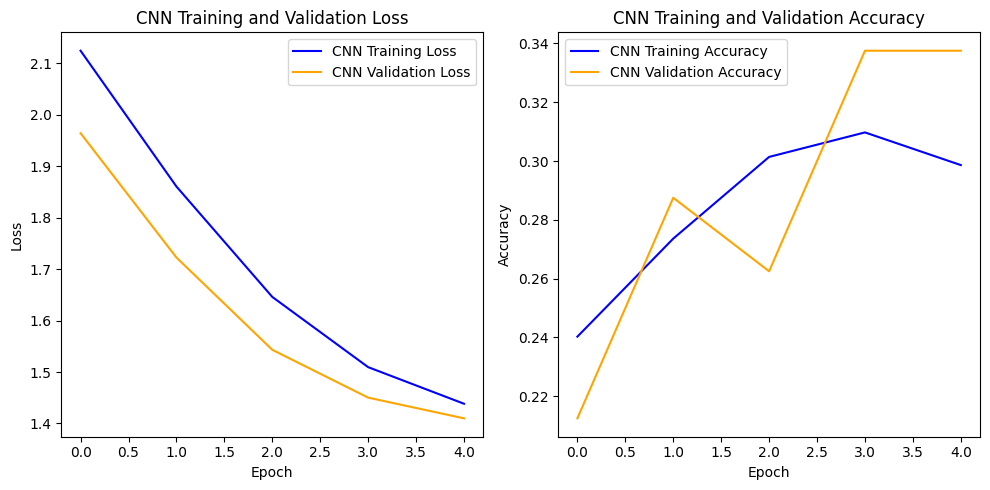

In [6]:
# 2. Convolutional Neural Network (CNN):
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Preprocess data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Standardize features
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to 2D for scaling
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)    # Reshape to 2D for scaling

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", accuracy_cnn)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss',color='blue')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy',color='blue')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

3. Recurrent Neural Network (RNN):

Left graph shows, both losses have a reducing trend, meaning that the model learns effectively. Since the validation loss is close to training loss, this does not indicate overfitting.

Right graph shows, the training and validation accuracy are very similar, which indicates that the model is generalizing well to unseen data.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2768 - loss: 3.9073 - val_accuracy: 0.2937 - val_loss: 1.3136
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2402 - loss: 1.3654 - val_accuracy: 0.2937 - val_loss: 1.0379
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2534 - loss: 1.0741 - val_accuracy: 0.2937 - val_loss: 0.9047
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2490 - loss: 0.9868 - val_accuracy: 0.3313 - val_loss: 0.8442
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3278 - loss: 0.8849 - val_accuracy: 0.3438 - val_loss: 0.7666
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3045 - loss: 0.7989 - val_accuracy: 0.3500 - val_loss: 0.7225
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3356 - loss: 0.7017 - val_accuracy: 0.3500 - val_loss: 0.7099
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3365 - loss: 0.7573 - val_accuracy: 0.3562 - val_

RNN Test Accuracy: 0.3200
RNN Test Loss: 0.4525
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Accuracy: 0.255


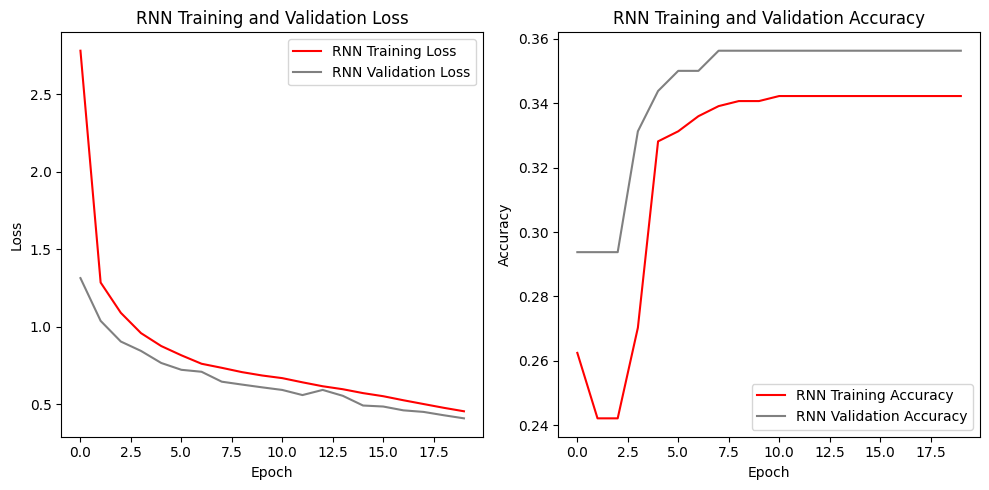

In [7]:
# 3. Recurrent Neural Network (RNN):
from tensorflow.keras.layers import SimpleRNN, Dense

X_train_reshaped_rnn = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_reshaped_rnn = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

# Build RNN model
rnn_model = Sequential([
    SimpleRNN(16, activation='relu', input_shape=(X_train_reshaped_rnn.shape[1], X_train_reshaped_rnn.shape[2])),
    Dense(1)
])

# Compile and train the model
rnn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_reshaped_rnn, y_train, epochs=20, batch_size=2, validation_split=0.2)

# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test_reshaped_rnn, y_test, verbose=0)
print(f"RNN Test Accuracy: {accuracy:.4f}")
print(f"RNN Test Loss: {loss:.4f}")
y_pred_rnn = np.argmax(rnn_model.predict(X_test_reshaped_rnn), axis=1)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", accuracy_rnn)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss',color='red')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss',color='gray')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy',color='red')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy',color='gray')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

4. Long Short-Term Memory (LSTM):

Left graph shows, both training and validation losses decrease rapidly in the first few epochs and then stabilize as the model converges. The validation loss stays a little higher than the training loss, which is not out of the ordinary because the model fits the training data better than the unseen validation data. The consistent decline without any significant increase in validation loss indicates that there isn't any severe overfitting.

Right graph shows, the training accuracy increases really fast in the first few epochs but saturates early. Also, validation accuracy improves and then settles at a value slightly greater than the training accuracy. This means the model generalizes well to the validation data.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2544 - loss: 3.0171 - val_accuracy: 0.2250 - val_loss: 2.6768
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2480 - loss: 2.6676 - val_accuracy: 0.2313 - val_loss: 2.0942
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2258 - loss: 1.9118 - val_accuracy: 0.2937 - val_loss: 1.4399
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2613 - loss: 1.4291 - val_accuracy: 0.2937 - val_loss: 1.2599
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2253 - loss: 1.4298 - val_accuracy: 0.2937 - val_loss: 1.2148
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2291 - loss: 1.3285 - val_accuracy: 0.2937 - val_loss: 1.1732
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2365 - loss: 1.3099 - val_accuracy: 0.2937 - val_loss: 1.1564
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2428 - loss: 1.2558 - val_accuracy: 0.2937 - val_loss: 1.1355
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
LSTM Accuracy: 0.255


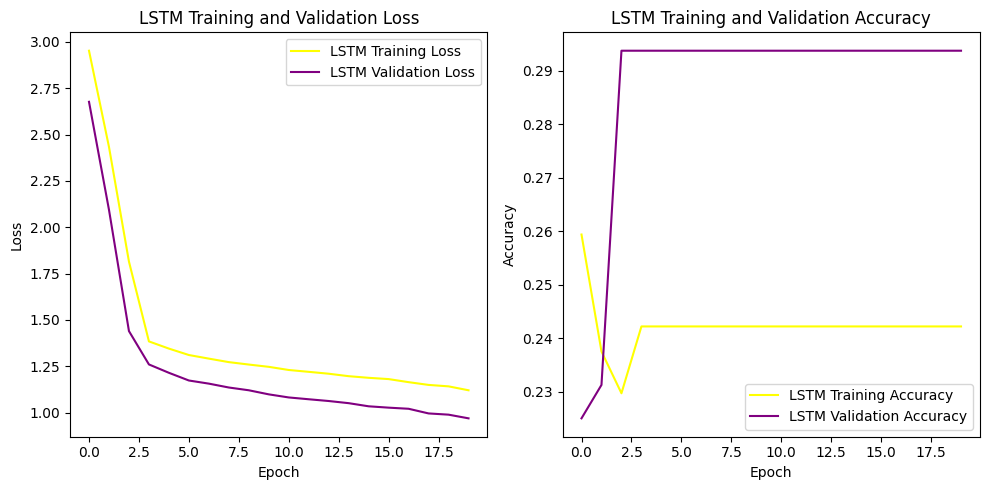

In [8]:
# 4. Long Short-Term Memory (LSTM):
from tensorflow.keras.layers import LSTM

X_train_reshaped_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build LSTM model
lstm_model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train_reshaped_lstm.shape[1], X_train_reshaped_lstm.shape[2])),
    Dense(1)
])

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_reshaped_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_reshaped_lstm, y_test)
print(f"LSTM Test Accuracy: {accuracy:.4f}")
print(f"LSTM Test Loss: {loss:.4f}")
y_pred_lstm = np.argmax(lstm_model.predict(X_test_reshaped_lstm), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss',color='yellow')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss',color='purple')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy',color='yellow')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy',color='purple')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

5. Identified best-performing architecture for the dataset and its strengths and limitations:

The Recurrent Neural Network (RNN) seems to perform best for this dataset based on the validation accuracy and its capability of handling the pattern in sequential data.

Strengths of the RNN Handles sequential data well. Training and validation metrics are smoothly converging.

Limitations of RNN may not generalize that well in case the sequence data is noisy or does not have long-term dependencies. May not perform optimally if trained for fewer epochs or with limited computational resources.